In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Enable interactive mode 
#%matplotlib widget

## Mathematics, a tool to find optimal solutions

### Gradient for Optimization

In [2]:
# Define 1D and 2D convex functions and their gradients
def f0_1d(x): #convex
    return x**2 - 4*x + 4

def grad_f0_1d(x):
    return 2*x - 4

def f1_1d(x): #nonconvex
    return .25 *  (x**2 - 27)**2

def grad_f1_1d(x):
    return x * (x**2 - 27)

def f2d(x, y):
    return .5 * (x - 1)**2 + .5 * (y + 1)**2 

def grad_f2d(x, y):
    return np.array([x - 1, y + 1])



In [3]:
# Gradient Descent algorithm for 1D function
def gradient_descent_1d(f, grad_f, x0, learning_rate, max_iter):
    x = x0
    history = [x0]
    for i in range(max_iter):
        x = x - learning_rate * grad_f(x)
        history.append(x)
    return x, history

# Gradient Descent algorithm for 2D function
def gradient_descent_2d(f, grad_f, x0, learning_rate, max_iter):
    x = x0
    history = [x0]
    for i in range(max_iter):
        x = x - learning_rate * grad_f(*x)
        history.append(x)
    return x, history

In [4]:
# Plotting function for 2D function
def plot_2d_func(f):
    x_vals = np.linspace(-5, 5, 20)
    y_vals = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    # Create the plot 
    fig = plt.figure(figsize=(10, 7)) 
    ax = fig.add_subplot(111, projection='3d') 
    ax.plot_surface(X, Y, Z, cmap='viridis') 
    ax.set_xlabel('X') 
    ax.set_ylabel('Y') 
    ax.set_zlabel('f(X, Y)') 
    ax.set_title('3D Plot of a 2D Function')
    plt.show()
#plot_2d_func(f2d)

### Convexity and Lipschitz continuity simplify Optimization

Choice of the step size becomes delicate

Initial guess is also just a guess. It influences minimization of nonconvex functions

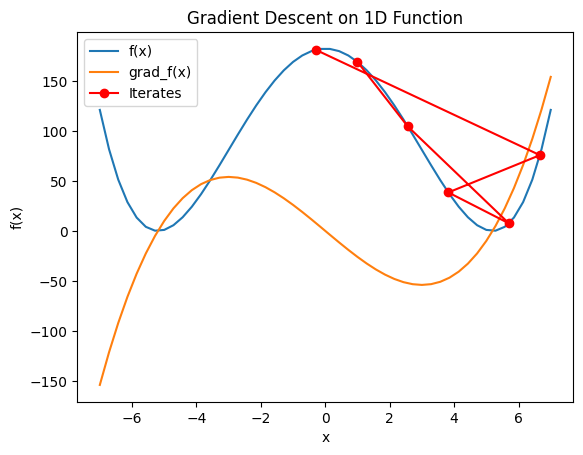

In [5]:
# Plotting function for 1D function
def plot_1d(f, grad_f, history):
    x_vals = np.linspace(-7, 7, 50)
    y_vals = f(x_vals)
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(x_vals, grad_f(x_vals), label='grad_f(x)')
    plt.plot(history, [f(x) for x in history], 'ro-', label='Iterates')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.title('Gradient Descent on 1D Function')
    plt.show()

# Initial parameters
x0_1d = 1
learning_rate_1d = 0.06
max_iter = 5

# Perform Gradient Descent on 1D function
functions_and_grad_1D = [[f0_1d, grad_f0_1d], [f1_1d, grad_f1_1d]]
[f, grad_f] = functions_and_grad_1D[1]
final_x_1d, history_1d = gradient_descent_1d(f, grad_f, x0_1d, learning_rate_1d, max_iter)
plot_1d(f, grad_f, history_1d) 

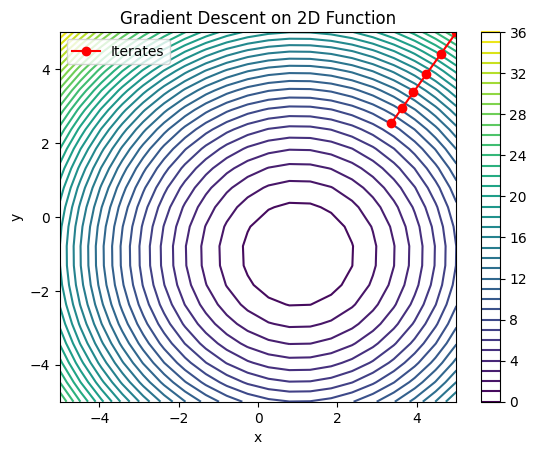

In [6]:
# Plotting function for 2D function
def plot_2d(f, history):
    x_vals = np.linspace(-5, 5, 20)
    y_vals = np.linspace(-5, 5, 20)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)
    
    plt.contour(X, Y, Z, levels=40, cmap='viridis')
    hx, hy = zip(*history)
    plt.plot(hx, hy, 'ro-', label='Iterates')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Gradient Descent on 2D Function')
    plt.colorbar()
    plt.show()



# Initial parameters for 2D function
x0_2d = np.array([5, 5])
learning_rate_2d = 0.1

# Perform Gradient Descent on 2D function
final_x_2d, history_2d = gradient_descent_2d(f2d, grad_f2d, x0_2d, learning_rate_2d, max_iter)
plot_2d(f2d, history_2d)


In [7]:
#C:\Users\sefojere\AppData\Local\miniconda3\envs\howfar

## Signal sampling 

gives you finite number of information on the signal, to work with on a computer.

The more you sample (higher frequency sampler), the more details you get.

### Case 1 : 1D signals become vectors

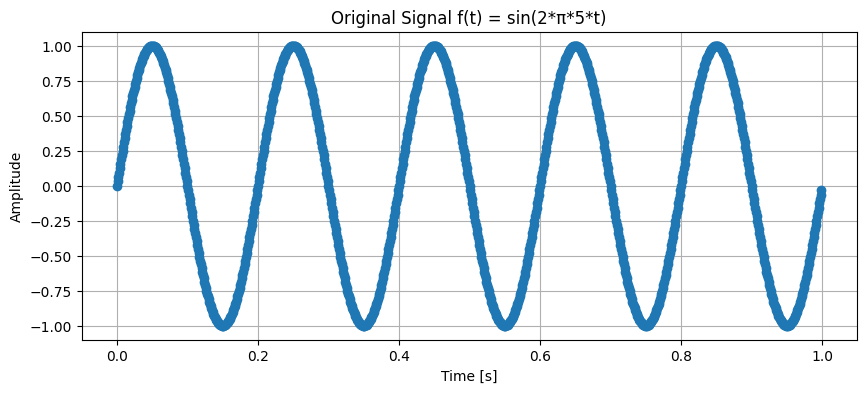

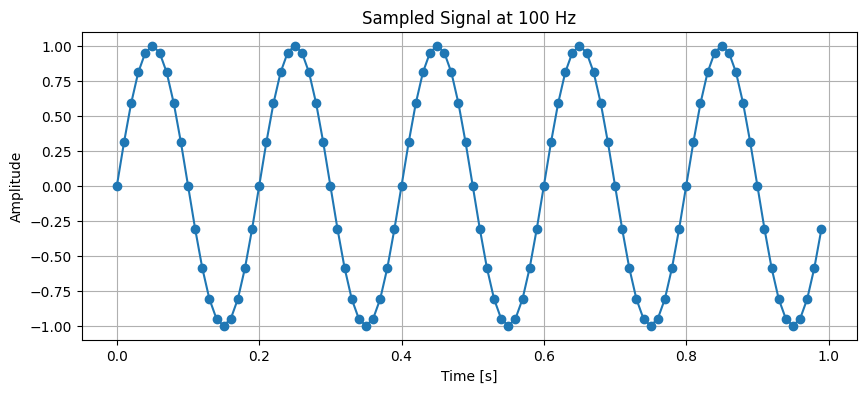

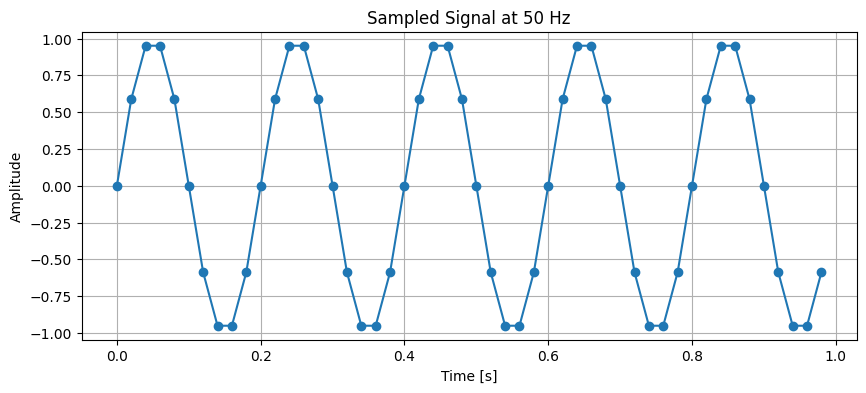

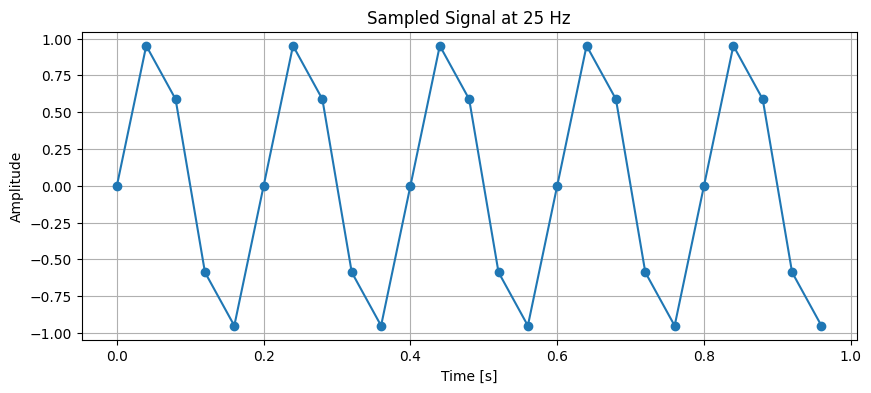

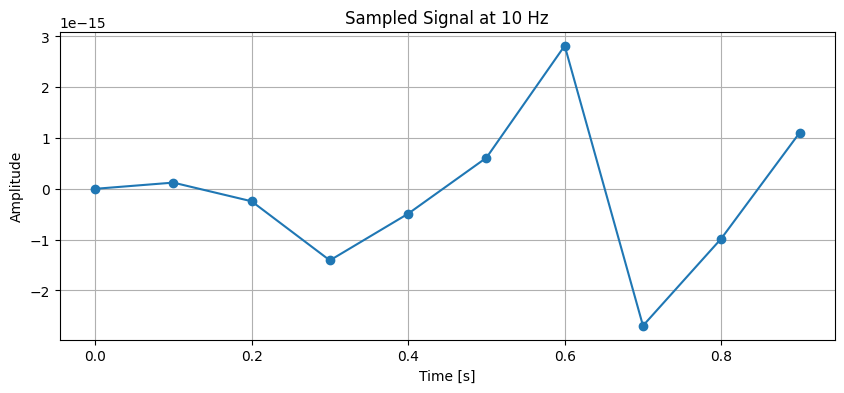

In [8]:
# Function to generate and sample the signal 
def sample_signal(sample_rates, duration=1): 
    frequency = 5 
    t_or = np.arange(0, duration, 1/1000) 
    signal_or = np.sin(2 * np.pi * frequency * t_or)
    plt.figure(figsize=(10, 4)) 
    plt.plot(t_or, signal_or, marker='o') 
    plt.title(f'Original Signal f(t) = sin(2*π*{frequency}*t)') 
    plt.xlabel('Time [s]') 
    plt.ylabel('Amplitude') 
    plt.grid(True)

    for sample_rate in sample_rates:
        # Time vector based on the sample rate and duration 
        t = np.arange(0, duration, 1/sample_rate) 
        # Generate a sinusoidal signal (e.g., 5 Hz) 
        
        signal = np.sin(2 * np.pi * frequency * t) 

        # Plot the sampled signal 
        plt.figure(figsize=(10, 4)) 
        plt.plot(t, signal, marker='o') 
        plt.title(f'Sampled Signal at {sample_rate} Hz') 
        plt.xlabel('Time [s]') 
        plt.ylabel('Amplitude') 
        plt.grid(True)
    return t, signal 
sample_rates = [100, 50, 25, 10]
t, signal = sample_signal(sample_rates, duration=1)

### Case 2 : 2D images become matrices i.e. discretized functions of 2D space

C:\Users\sefojere\AppData\Local\Temp\ipykernel_7360\2839272346.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


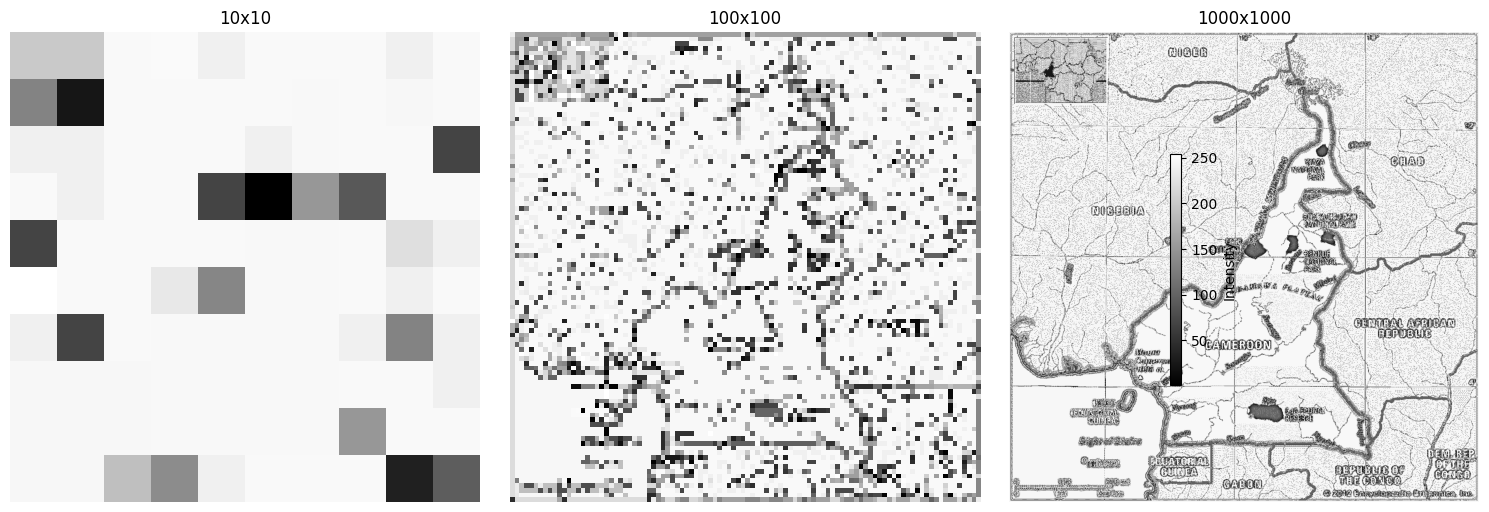

In [9]:
from PIL import Image 
# Function to plot an image at different resolutions 
def plot_image_at_resolutions(image_path, resolutions): 
    # Load the image 
    image = Image.open(image_path) 
    fig, axes = plt.subplots(1, len(resolutions), figsize=(15, 5)) 
    for ax, resolution in zip(axes, resolutions): 
        # Resize the image 
        resized_image = image.resize(resolution) 
        # Convert to numpy array for plotting 
        resized_array = np.array(resized_image) 
        # Plot the resized image 
        im = ax.imshow(resized_array, cmap='gray') #viridis #cividis #magma #plasma #inferno
        ax.set_title(f'{resolution[0]}x{resolution[1]}') 
        ax.axis('off') # Hide axes 
    # # Add a single color bar for all plots 
    cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6) 
    cbar.set_label('Intensity')
    plt.tight_layout()    
    plt.show() 
    return resized_array
# Path to the image 
image_path = r'C:\Users\sefojere\Downloads\Cameroon_map.jpg' 
# List of resolutions (width, height) to display 
resolutions = [(10, 10), (100, 100), (1000, 1000)] 
# Plot the image at specified resolutions 
resized_array = plot_image_at_resolutions(image_path, resolutions)

## Inverse Problems

### Some Linear Algebra  
(start a Whiteboard sharing)

Idea: Point out matrix-vector multiplication as sensing/measuring (Physics, frequencies components for e.g.) the
object properties. 

Explain the concepts of overdetermine system/matrix, matrix with kernel, or matrix with
full range. 

Continue with their implication in object recovery from measurements.

### Example 1 of sensing matrix : Fourier Transform

\begin{align}
F(u) =  \int_{\mathbb{R}^d} f(x) \exp{(-i2\pi u \cdot x)} dx

\end{align}

#### Motivation

If you combine sound waves, for example by playing several notes at the same time, their magnitudes sum to create a new wave that hits your ear. 

Here’s three individual simple sine waves (in blue), and their sum (in black).

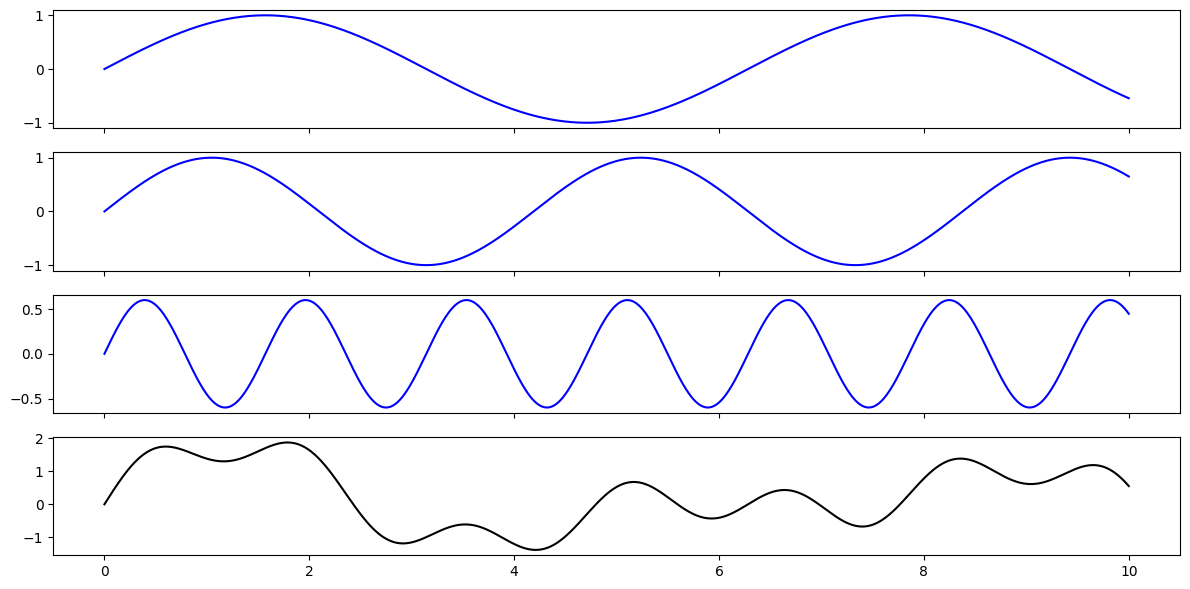

In [10]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(12,6))

ss = 1000
ts = np.linspace(0, 10, ss)

ys = np.zeros((3, ss))
ys[0,:] = np.sin(ts)
ys[1,:] = np.sin(1.5 * ts)
ys[2,:] = 0.6 * np.sin(4 * ts)

for k, ax in enumerate(axs[:3]):
    ax.plot(ts, ys[k,:], 'b-')

axs[-1].plot(ts, np.sum(ys, axis=0), 'k-')

plt.tight_layout()
plt.show()


#### Problem : Can we extract the contributing parts precisely, from the combined curve?

Yes, It’s possible, using Fourier transforms.

It decomposes the signal into frequency components: 

<img src="https://raw.githubusercontent.com/aavella77/fft/main/24.02.02-time_frequency.png" width=950>

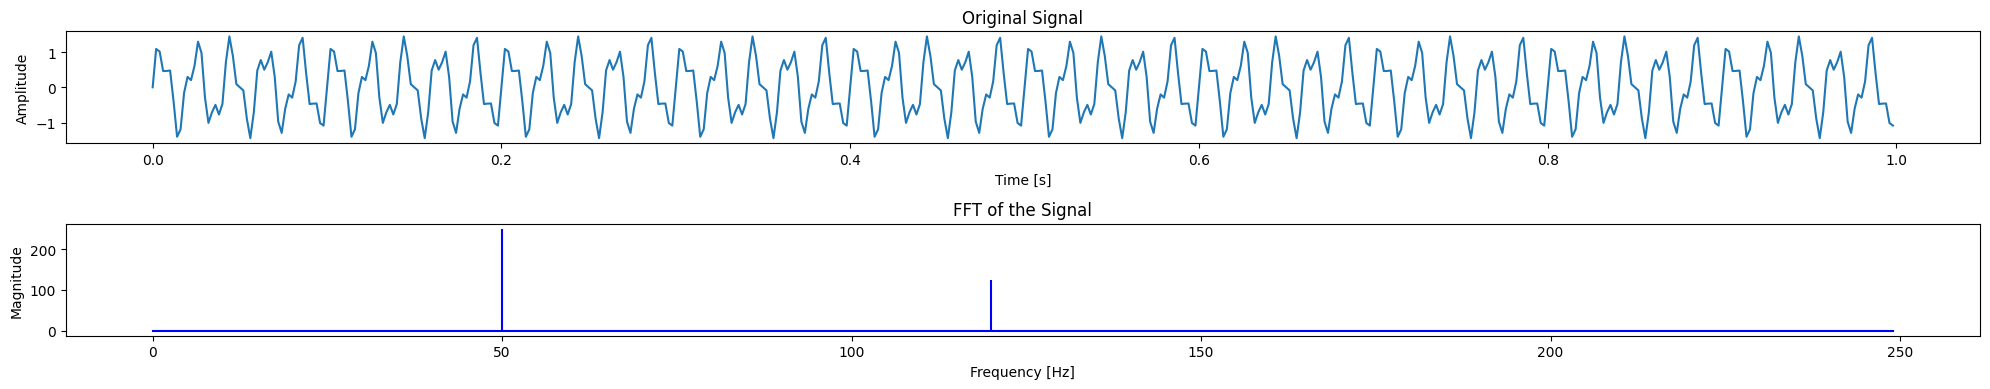

In [18]:
# Generate a sample signal 
fs = 500 # Sampling frequency 
t = np.arange(0, 1, 1/fs) # Time vector 
# Signal with two frequencies: 50 Hz and 120 Hz 
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t) 
# Compute the Fast Fourier Transform (FFT) 
fft_values = np.fft.fft(signal) 
fft_freq = np.fft.fftfreq(len(signal), 1/fs) 
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, signal) 
plt.title('Original Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

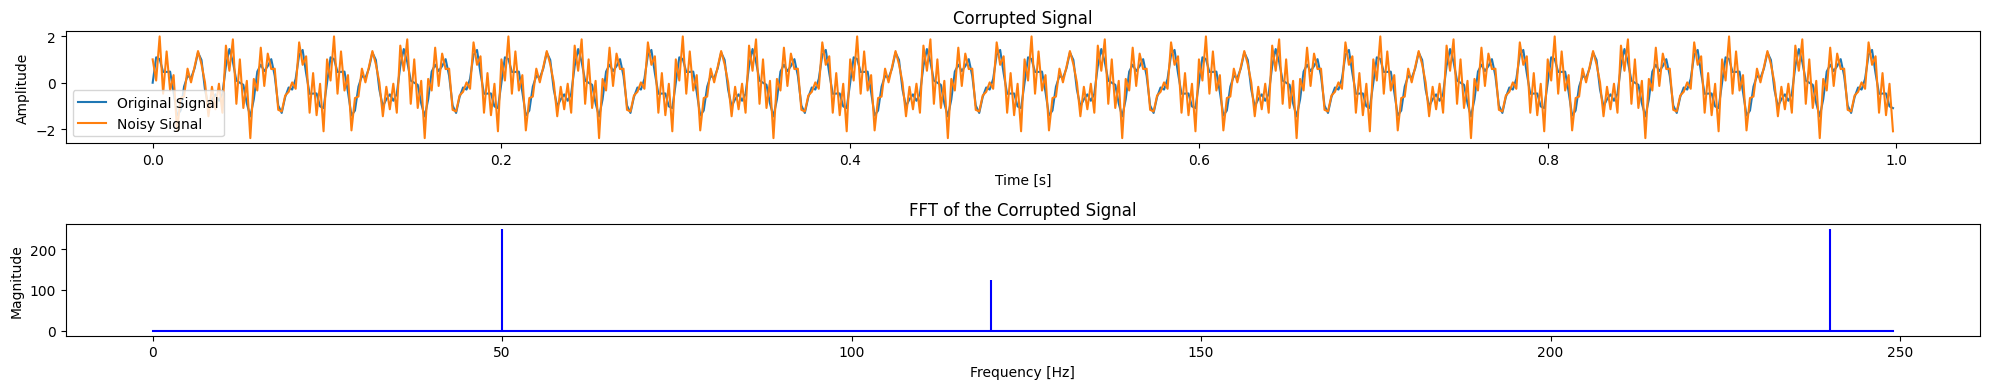

In [19]:
noise_freq = 240
noise = 1 * np.cos(2 * np.pi * noise_freq * t)
noisy_signal = signal +  noise
# Compute the Fast Fourier Transform (FFT) 
fft_values = np.fft.fft(noisy_signal) 
fft_freq = np.fft.fftfreq(len(noisy_signal), 1/fs) 
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, signal, label='Original Signal') 
plt.plot(t, noisy_signal, label='Noisy Signal')
#plt.plot(t, signal, t, noisy_signal ) 
plt.title('Corrupted Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
plt.legend()
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Corrupted Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

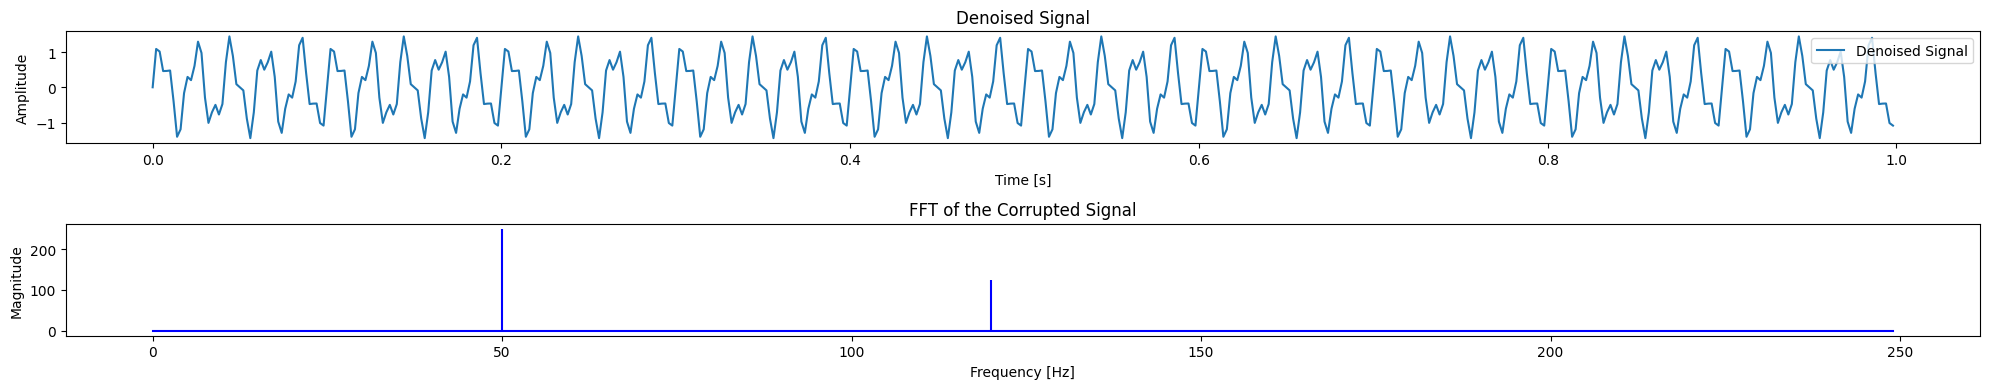

In [20]:
cut_fft_values = fft_values * (np.abs(fft_freq) <  noise_freq )
denoised_signal = np.fft.ifft(cut_fft_values)
fft_values = np.fft.fft(denoised_signal)
# Plot the signal 
plt.figure(figsize=(20, 4)) 
plt.subplot(2, 1, 1) 
plt.plot(t, denoised_signal, label='Denoised Signal') 
#plt.plot(t, signal, t, noisy_signal ) 
plt.title('Denoised Signal') 
plt.xlabel('Time [s]') 
plt.ylabel('Amplitude')
plt.legend()
# Plot the FFT 
plt.subplot(2, 1, 2) 
plt.stem(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2], 'b', markerfmt=" ", basefmt="-b") 
plt.title('FFT of the Corrupted Signal') 
plt.xlabel('Frequency [Hz]') 
plt.ylabel('Magnitude') 
plt.tight_layout() 
plt.show()

### Example 2 of sensing matrix : Convolution operator : Image deblurring

C:\Users\sefojere\AppData\Local\Temp\ipykernel_7360\782704164.py:64: RuntimeWarning: divide by zero encountered in divide
  deblurred_fft = compute_fft(blurred_image) / h
C:\Users\sefojere\AppData\Local\Temp\ipykernel_7360\782704164.py:64: RuntimeWarning: invalid value encountered in divide
  deblurred_fft = compute_fft(blurred_image) / h


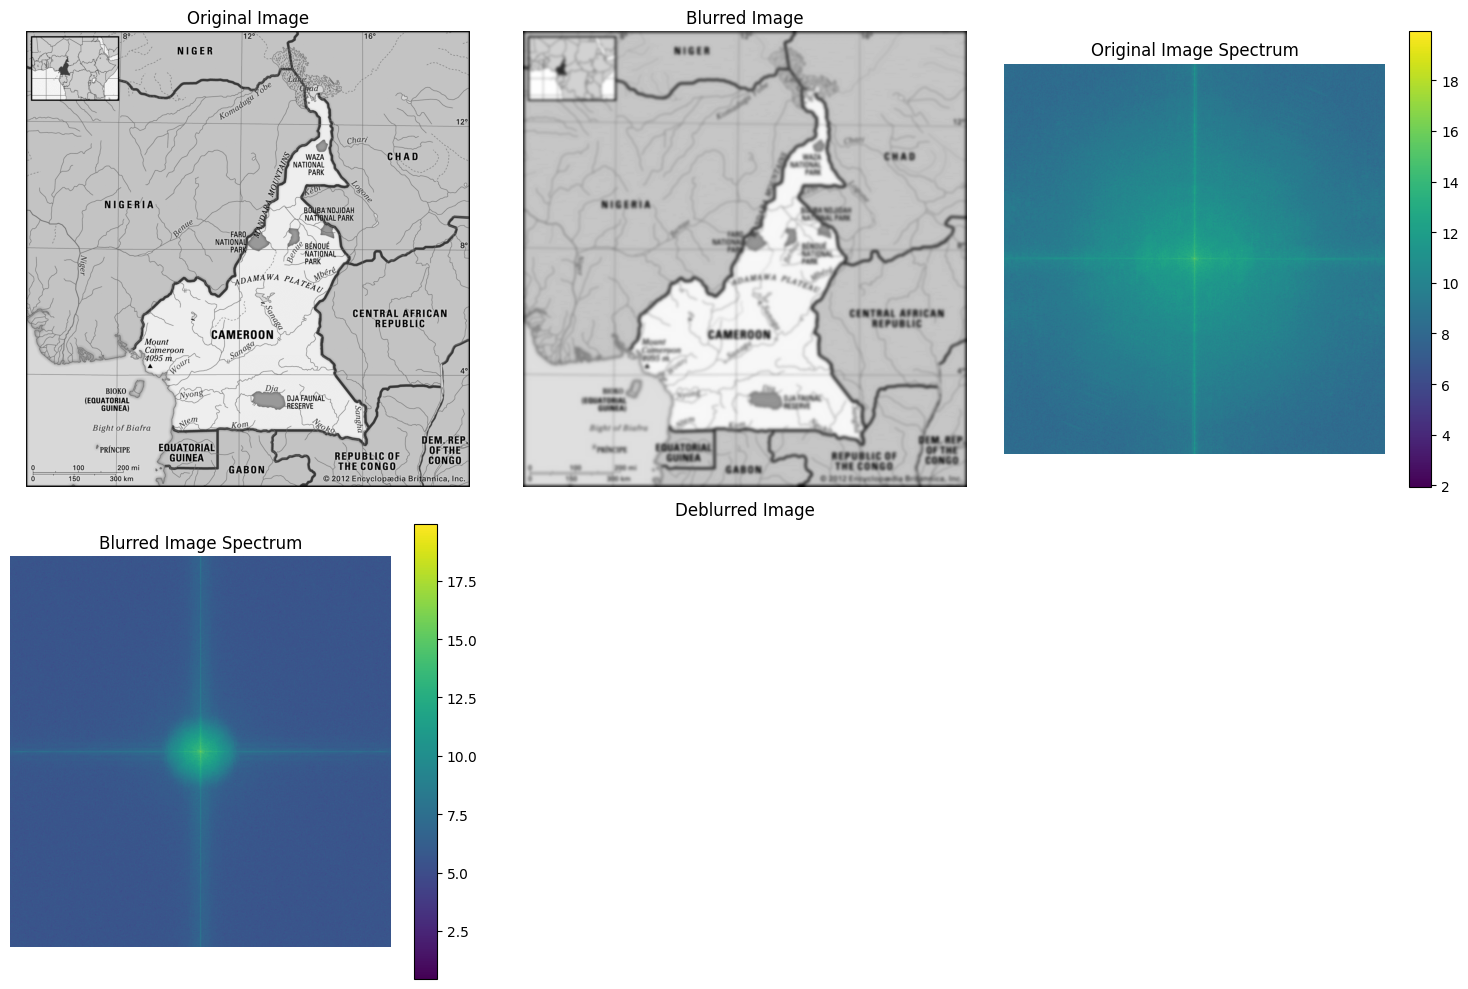

In [93]:
from scipy.fftpack import fft2, ifft2, fftshift
from scipy.ndimage import gaussian_filter

# Function to load and convert image to grayscale
def load_image(image_path):
    image = Image.open(image_path).convert('L')
    #image = image.resize((10, 10))
    return np.array(image)

# Function to plot an image
def plot_image(image, title, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

# Function to blur an image
def blur_image_t(image, cut_depth):
    mask = np.zeros_like(image)
    (Nx, Ny) = image.shape
    NumPix =  np.floor(0.5 * (1-2**(-cut_depth)) *Nx)
    bord = NumPix/Nx
    mask[int(bord * Nx):int((1-bord)*Nx),int(bord * Ny):int((1-bord)*Ny)] = ((1)*1 ) * np.ones((int((1-2*bord)*Nx),int((1-2*bord)*Ny)))
 
    sigma = 0
    h = np.zeros_like(image)
    h[image.shape[0]//4 : (3 * image.shape[0])//4, image.shape[0]//4 : (3 * image.shape[0])//4] = np.exp(-(sigma**2)) #h[:image.shape[0]//2, :image.shape[1]//2] = np.exp(-(sigma**2)) #
    #h[image.shape[0]//2:, image.shape[1]//2:] = np.exp(-(sigma**2))
    #h = fftshift(h)

    return np.abs(ifft2(fft2(image) * h)) #gaussian_filter(image, sigma=sigma)

def blur_image(image, sigma):
    return gaussian_filter(image, sigma=sigma)
# Function to compute the Fourier Transform and shift zero frequency component to center

def compute_fft(image):
    return fftshift(fft2(image))

# Function to plot the magnitude spectrum
def plot_spectrum(fft_image, title):
    magnitude_spectrum = np.log1p(np.abs(fft_image))
    plt.imshow(magnitude_spectrum, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.axis('off')

# Function to deblur an image (simple inverse filter)
def deblur_image(blurred_image, sigma=5):
    # Create a Gaussian kernel in frequency domain
    h = np.zeros_like(blurred_image)
    h[:blurred_image.shape[0]//2, :blurred_image.shape[1]//2] = np.exp(-(sigma**2))
    h[blurred_image.shape[0]//2:, blurred_image.shape[1]//2:] = np.exp(-(sigma**2))
    #plt.imshow(h)
    #plt.title('Gaussian kernel')
    #plt.colorbar()
    #plt.axis('off')
    h = fftshift(h)
    #plt.imshow(h)
    #plt.title('Gaussian kernel in Fourier space')
    #plt.colorbar()
    #plt.axis('off')
    
    # Deblur using inverse filtering in frequency domain
    deblurred_fft = compute_fft(blurred_image) / h
    deblurred_image = np.abs(ifft2(deblurred_fft))
    return deblurred_image, h

# Main code
image_path = r'C:\Users\sefojere\Downloads\Cameroon_map.jpg'

# Load the image
original_image = load_image(image_path)

# Blur the image
blurred_image = blur_image(original_image, sigma = 5)
#blurred_image = blur_image_t(original_image, cut_depth = 0.5)

# Compute FFT of original and blurred images
original_fft = compute_fft(original_image)
blurred_fft = compute_fft(blurred_image)

# Deblur the image
deblurred_image, h = deblur_image(blurred_image, sigma=5)


# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plot_image(original_image, 'Original Image')

plt.subplot(2, 3, 2)
plot_image(blurred_image, 'Blurred Image')

plt.subplot(2, 3, 3)
plot_spectrum(original_fft, 'Original Image Spectrum')

plt.subplot(2, 3, 4)
plot_spectrum(blurred_fft, 'Blurred Image Spectrum')

plt.subplot(2, 3, 5)
plot_image(deblurred_image, 'Deblurred Image')

plt.tight_layout()
plt.show()


### Example 3 of sensing matrix : Identity Matrix : Image TV denoising